'data.frame':	15 obs. of  3 variables:
 $ V1: num  28 26 31 27 35 34 29 25 31 29 ...
 $ V2: int  1 1 1 1 1 2 2 2 2 2 ...
 $ V3: int  1 2 3 4 5 1 2 3 4 5 ...


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
color,2,7.6,3.8,0.3917526,0.6842074
Residuals,12,116.4,9.7,NA,NA


Color,mean,SD,n
blue,29.4,3.647,5
green,29.6,3.286,5
orange,28.0,2.236,5


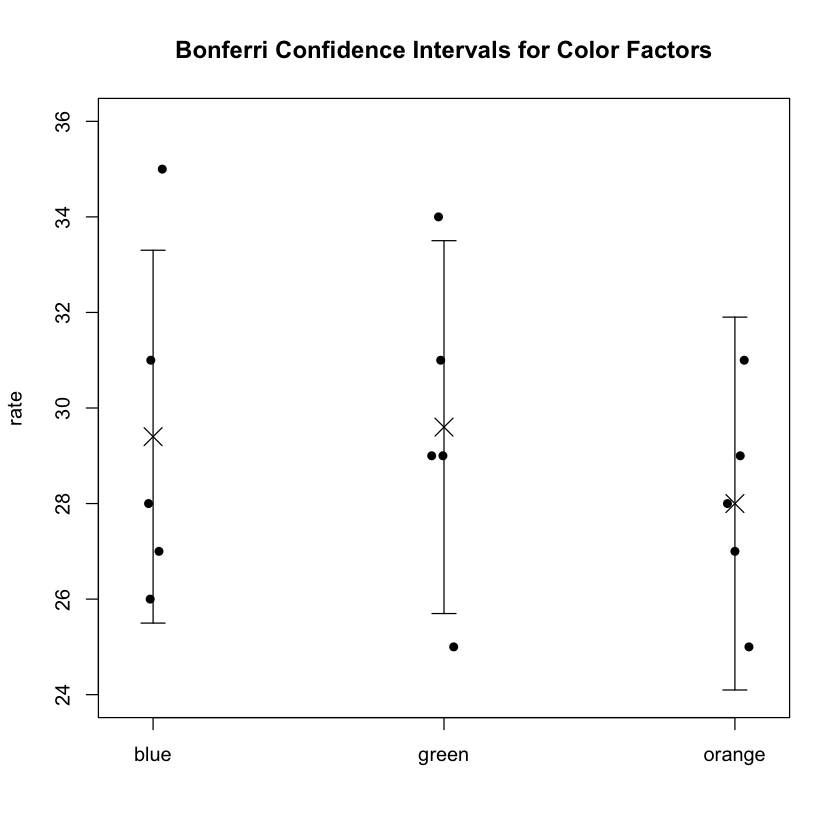

In [6]:
# Script file for Homework 3
#  Questionnaire Colors
#########################################################
#  1A SUPPLY A COMMENT STATING WHAT LINES 1, 3, 4 DO
###########################################################
#This line reads in the dataset from a text file, it says there is no header in the file.
question <- read.table("Datasets/CH16PR08.txt",header=FALSE)
str(question)
#This line assigns a label to the columns of the dataset
names(question) <- c("rate","color","obs")
#This line assigns a label to the different factors of the color column
question$color <- factor(question$color,labels=c("blue","green","orange"))
attach(question)
#########################################################
# 1BC SUPPLY A COMMENT STATING WHAT THE NEXT THREE LINES DO
#########################################################
# The next three lines create a vertical strip chart for the color data, with some jitter.
# We then make an anova table for the color factor
stripchart(rate~color, method="jitter",
           jitter=0.05,pch=16,vert=TRUE,
           ylim=c(24,36), main="Bonferri Confidence Intervals for Color Factors")
fit1 <- aov(rate~color)
anova(fit1)
# Obtain and print group means, SDs, and sample sizes.
ybar <- aggregate(rate,list(color=color),mean)$x
sds <- aggregate(rate, list(color=color), sd)$x
n <- aggregate(rate, list(color=color), length)$x
data.frame(Color=levels(question$color),mean=ybar,SD=round(sds,digits=3),n=n)
# Obtain the critical constant for three CIs by Bonferroni
###########################################################
#  1E REPLACE THE XXX BY A NUMERICAL VALUE OR FORMULA
###########################################################
#For this constant, we have 3 linear combinations so g = 3, Bonferroni is 1-a/g 
cc <- qt(.992, df=length(rate) - 3)
# Obtain and plot three simultaneous confidence intervals
#  for the group means by the Bonferroni method.
df.res <- fit1$df.residual
mse <- sum((fit1$residuals)^2)/df.res
se.of.mean <- sqrt(mse)/sqrt(n)
allow <- se.of.mean*cc
arrows(1:3,ybar+allow,1:3,ybar-allow,angle=90,
       code=3,length=.1)
lines(1:3,ybar,pch=4,type="p",cex=2)
###########################################################
# 1F SUPPLY A TITLE FOR THE PLOT.
#    THIS CAN BE DONE IN YOUR WORD DOCUMENT.
###########################################################
#
# Clean up
detach(question)
#

